<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Pantea Amoie

**Student ID**: 400101656



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [2]:
data = pd.read_csv("boston.csv")
print(data.shape)
data

(506, 14)


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


**Answer :**\
Boston dataset contains housing-related data for various suburbs in Boston.\
It has 506 observations and 14 variables(attributes). Each row represents data for one suburb in Boston.\
Its features :\
CRIM: Per capita crime rate by town.\
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.\
INDUS: Proportion of non-retail business acres per town.\
CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).\
NOX: Nitric oxides concentration (parts per 10 million).\
RM: Average number of rooms per dwelling.\
AGE: Proportion of owner-occupied units built before 1940.\
DIS: Weighted distances to five Boston employment centers.\
RAD: Index of accessibility to radial highways.\
TAX: Full-value property tax rate per 10,000 \\$.\
PTRATIO: Pupil-teacher ratio by town.\
B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.\
LSTAT: Percentage of lower status of the population.\
MEDV: Median value of owner-occupied homes in 1000's \\$ (target variable).

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [3]:
# Split dataset into train and test sets
Y = data['MEDV']
X = data.drop(columns = ['MEDV'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Train linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, Y_train)
# Predicted values of our model
Y_predicted_train = linear_reg_model.predict(X_train)
Y_predicted_test = linear_reg_model.predict(X_test)
# Calculate R2 and RMSE error metrics for both train and test sets
R2_train = r2_score(Y_train, Y_predicted_train)
R2_test = r2_score(Y_test, Y_predicted_test)
RMSE_train = sqrt(mean_squared_error(Y_train,Y_predicted_train))
RMSE_test = sqrt(mean_squared_error(Y_test, Y_predicted_test))
coefficients = linear_reg_model.coef_
# Report
print("R2 for train set: ", R2_train)
print("R2 for test set: ", R2_test)
print("RMSE for train set: ", RMSE_train)
print("RMSE for test set: ", RMSE_test)
print("Coefficients: ")
i = 0
for feature in X.columns:
    print(feature, ": ", coefficients[i])
    i += 1

R2 for train set:  0.7508856358979672
R2 for test set:  0.6687594935356292
RMSE for train set:  4.6520331848801675
RMSE for test set:  4.928602182665357
Coefficients: 
CRIM :  -0.11305592398537831
ZN :  0.030110464145644507
INDUS :  0.04038072041333624
CHAS :  2.784438203508
NX :  -17.202633391781383
RM :  4.438835199513039
AGE :  -0.0062963622109820355
DIS :  -1.44786536853078
RAD :  0.26242973558508587
TAX :  -0.01064678627530831
PTRATIO :  -0.9154562404680721
B :  0.01235133472996915
LSTAT :  -0.5085714244487954


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10**np.linspace (3,-3,100) *0.5$$

In [4]:
alphas = 10 ** np.linspace(3, -3, 100)*0.5

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

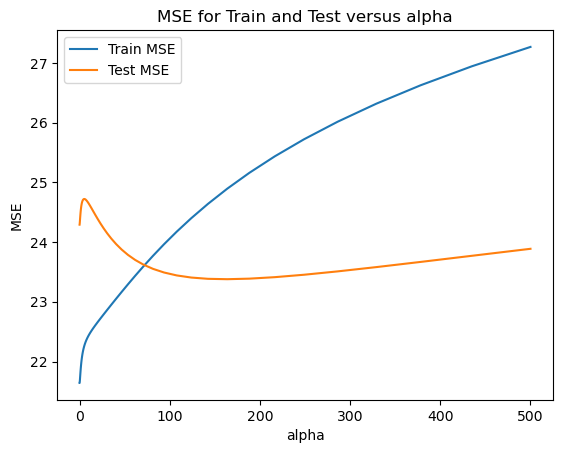

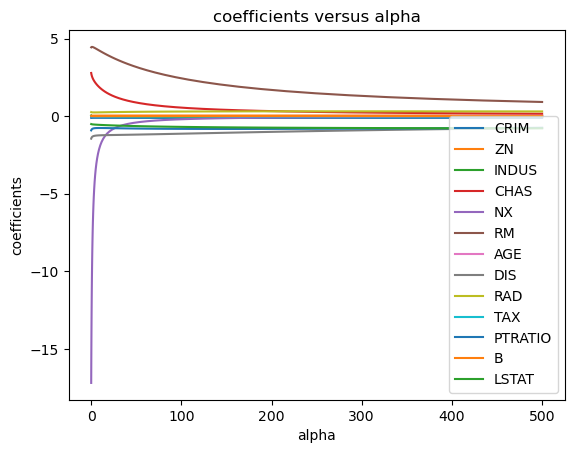

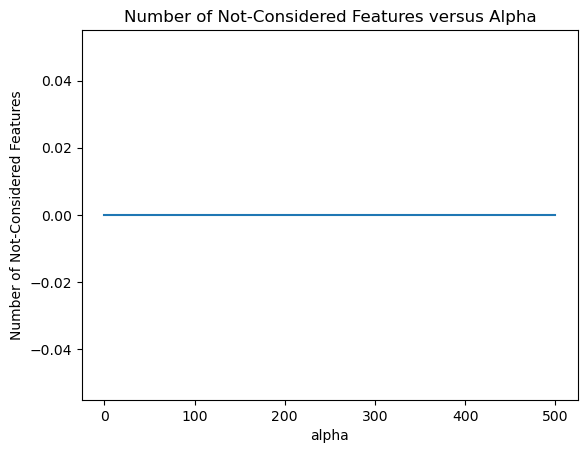

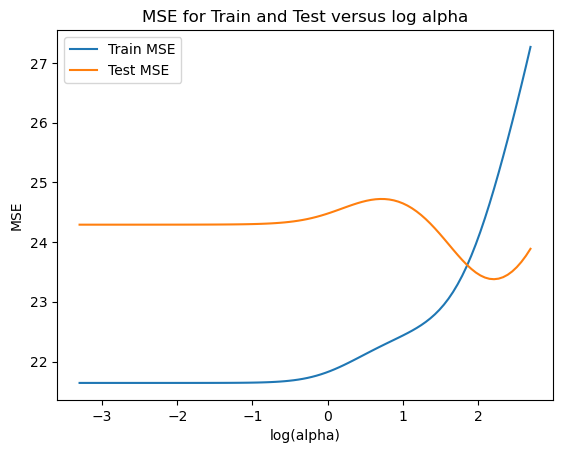

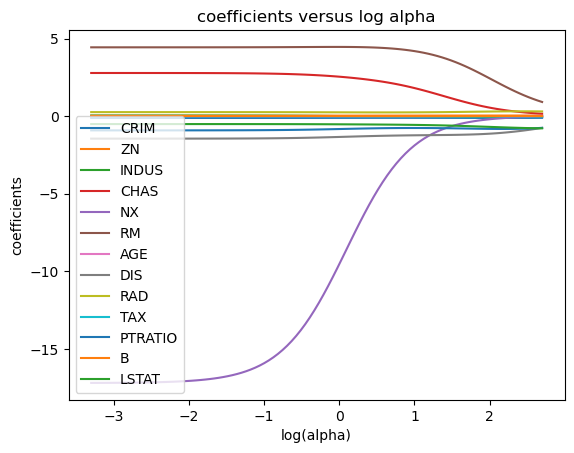

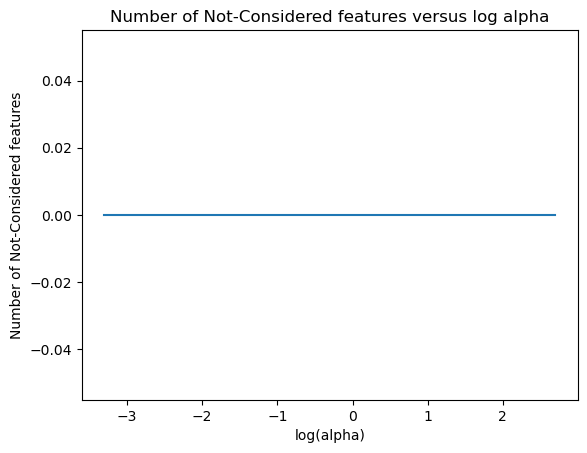

Optimal value for alpha:  163.72745814388642
MSE of optimal model for test set: 23.378168171507387
R^2 of optimal model for test set: 0.6812087531281752
MSE of optimal model for train set: 24.893440476055055
R^2 of optimal model for train set: 0.7134515354789044
Coefficients of optimal model:
CRIM :  -0.11058924017476467
ZN :  0.03996101938063592
INDUS :  -0.052001404240263796
CHAS :  0.3807340413242878
NX :  -0.1154179989538208
RM :  1.8972033058491382
AGE :  0.007097764390634335
DIS :  -1.0524156919831245
RAD :  0.309450898813214
TAX :  -0.014947408542740575
PTRATIO :  -0.8227218767661515
B :  0.011598413637365875
LSTAT :  -0.7258953858297859


In [5]:
MSE_train_list = []
MSE_test_list = []
coeff_list = []
not_considered_features_list = []
for alpha in alphas:
    # Ridge regression
    ridge_model = Ridge(alpha = alpha)
    ridge_model.fit(X_train, Y_train)
    # Predicted values of our model
    Y_predicted_train = ridge_model.predict(X_train)
    Y_predicted_test = ridge_model.predict(X_test)
    # Calculate MSE for both train and test sets & coefficients
    MSE_train = mean_squared_error(Y_train, Y_predicted_train)
    MSE_test = mean_squared_error(Y_test, Y_predicted_test)
    coefficient = ridge_model.coef_
    MSE_train_list.append(MSE_train)
    MSE_test_list.append(MSE_test)
    coeff_list.append(coefficient)
    # Calculate number of not-considered features
    not_considered_features = np.sum(ridge_model.coef_ == 0)
    not_considered_features_list.append(not_considered_features)
    
    
# Plot MSE values versus alpha
plt.plot(alphas, MSE_train_list, label = 'Train MSE')
plt.plot(alphas, MSE_test_list, label = 'Test MSE')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test versus alpha')
plt.legend()
plt.show()
    
# Plot the coefficients versus alpha
coeff_array = np.array(coeff_list)
for i in range(coeff_array.shape[1]):
    plt.plot(alphas, coeff_array[:, i], label = X.columns[i])
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('coefficients versus alpha')
plt.legend()
plt.show()

plt.plot(alphas, not_considered_features_list)
plt.xlabel('alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features versus Alpha')
plt.show()

# For better view we have also plotted with respect to log alpha
# Plot MSE values versus alpha
plt.plot(np.log10(alphas), MSE_train_list, label = 'Train MSE')
plt.plot(np.log10(alphas), MSE_test_list, label = 'Test MSE')
plt.xlabel('log(alpha)')
plt.ylabel('MSE')
plt.title('MSE for Train and Test versus log alpha')
plt.legend()
plt.show()

coeff_array = np.array(coeff_list)
for i in range(coeff_array.shape[1]):
    plt.plot(np.log10(alphas), coeff_array[:, i], label = X.columns[i])
plt.xlabel('log(alpha)')
plt.ylabel('coefficients')
plt.title('coefficients versus log alpha')
plt.legend()
plt.show()

plt.plot(np.log10(alphas), not_considered_features_list)
plt.xlabel('log(alpha)')
plt.ylabel('Number of Not-Considered features')
plt.title('Number of Not-Considered features versus log alpha')
plt.show()

# Finally select the optimal value of alpha
optimal_alpha = alphas[np.argmin(MSE_test_list)]
# Report MSE, R2 and coefficients
optimal_ridge_model = Ridge(alpha = optimal_alpha)
optimal_ridge_model.fit(X_train, Y_train)
optimal_Y_predicted_test = optimal_ridge_model.predict(X_test)
optimal_Y_predicted_train = optimal_ridge_model.predict(X_train)
optimal_MSE_test = mean_squared_error(Y_test, optimal_Y_predicted_test)
optimal_MSE_train = mean_squared_error(Y_train, optimal_Y_predicted_train)
optimal_coefficient = optimal_ridge_model.coef_
optimal_R2_test = r2_score(Y_test, optimal_Y_predicted_test)
optimal_R2_train = r2_score(Y_train, optimal_Y_predicted_train)

# Calculate MSE and R^2 for the optimal model
print("Optimal value for alpha: ", optimal_alpha)
print("MSE of optimal model for test set:", optimal_MSE_test)
print("R^2 of optimal model for test set:", optimal_R2_test)
print("MSE of optimal model for train set:", optimal_MSE_train)
print("R^2 of optimal model for train set:", optimal_R2_train)
print("Coefficients of optimal model:")
i = 0
for feature in X.columns:
    print(feature, ": ", optimal_coefficient[i])
    i += 1

**Answer:**\
MSE: Mean Squared Error (MSE) for Ridge regression (23.37) is slightly lower than that for Linear regression (24.2). This shows us that the Ridge regression model performs a little bit better in terms of minimizing the squared differences between predicted and actual values on the test set.\
R^2: R^2 value for Ridge regression (0.6812) is a little bit higher than that for Linear regression (0.6687). R^2 represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R^2 means the ridge regression model explains a larger portion of the variance in the target variable compared to linear regression.\
Coefficients: Ridge regression coefficients tend to be smaller compared to linear regression coefficients, and some of them are effectively shrunk towards zero, which is what we already expected because of the regularization term, which helps to avoid overfitting. As we know ridge regression performs feature selection implicitly by shrinking the coefficients of less important features towards zero.Ridge regression has a trade-off between model complexity and performance by penalizing large coefficients, which causes better generalization.

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

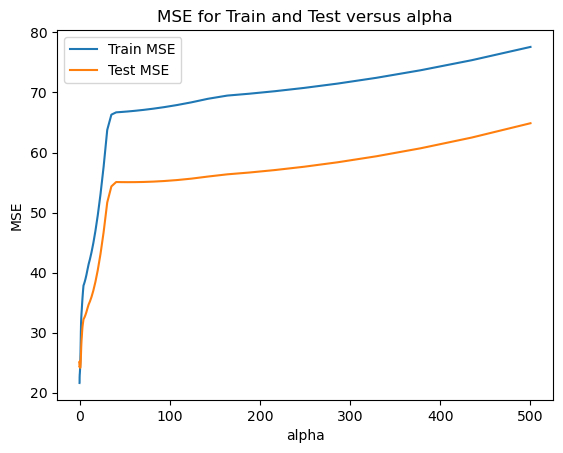

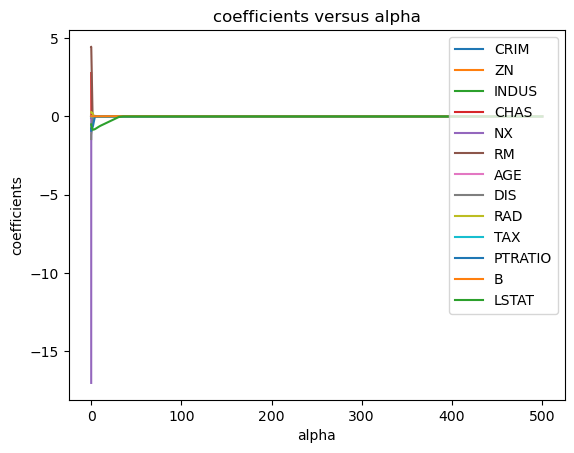

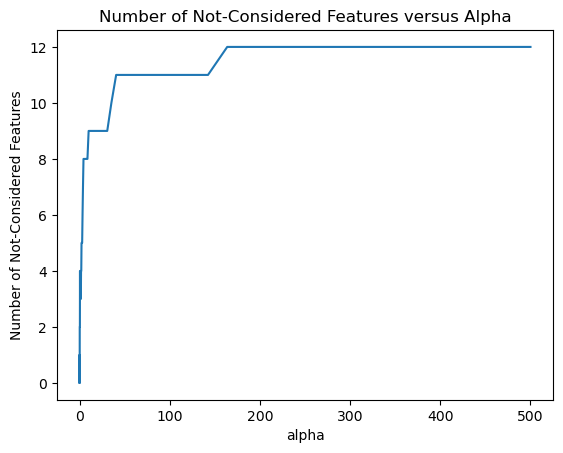

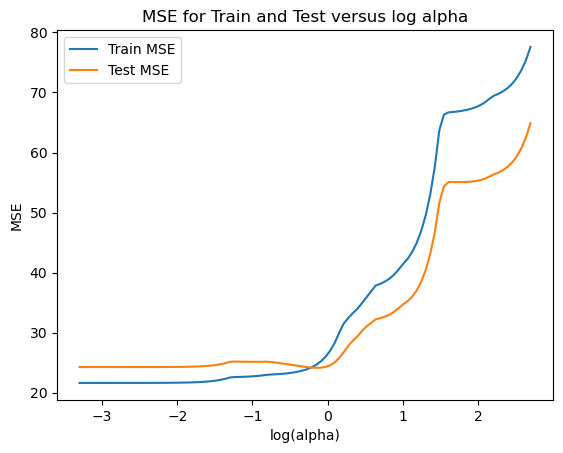

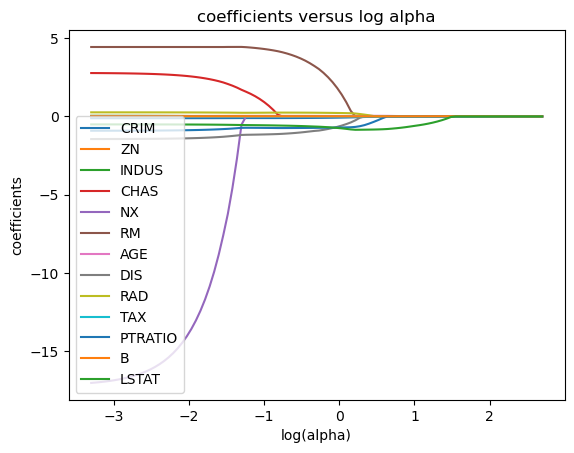

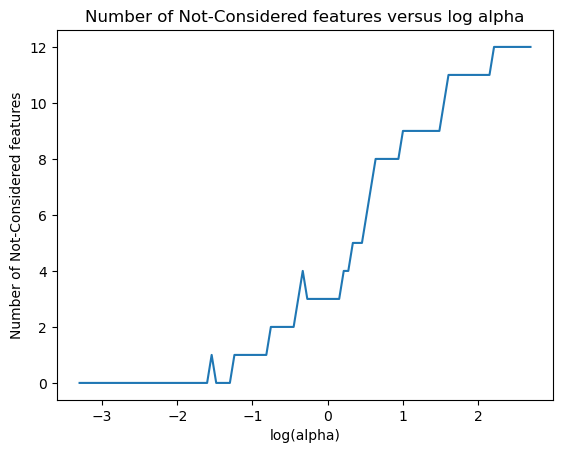

Optimal value for alpha:  0.7087370814634024
MSE of optimal model for train set: 24.68208868686117
R^2 of optimal model for train set: 0.715884406528832
MSE of optimal model for test set: 24.153219243073355
R^2 of optimal model for test set: 0.6706399397086964
Coefficients of optimal model:
CRIM :  -0.08616746198497378
ZN :  0.030806698587725032
INDUS :  -0.0
CHAS :  0.0
NX :  -0.0
RM :  2.508243729868582
AGE :  0.006114129499851337
DIS :  -0.801558000475593
RAD :  0.2293110199476798
TAX :  -0.012707166861721155
PTRATIO :  -0.7205718672396785
B :  0.011866421740392648
LSTAT :  -0.6895356401458913


In [6]:
MSE_train_list = []
MSE_test_list = []
coeff_list = []
not_considered_features_list = []
for alpha in alphas:
    # Lasso regression
    lasso_model = Lasso(alpha = alpha)
    lasso_model.fit(X_train, Y_train)
    # Predicted values of our model
    Y_predicted_train = lasso_model.predict(X_train)
    Y_predicted_test = lasso_model.predict(X_test)
    # Calculate MSE for both train and test sets & coefficients
    MSE_train = mean_squared_error(Y_train, Y_predicted_train)
    MSE_test = mean_squared_error(Y_test, Y_predicted_test)
    coefficient = lasso_model.coef_
    MSE_train_list.append(MSE_train)
    MSE_test_list.append(MSE_test)
    coeff_list.append(coefficient)
    # Calculate number of not-considered features
    not_considered_features = np.sum(lasso_model.coef_ == 0)
    not_considered_features_list.append(not_considered_features)
    
    
# Plot MSE values versus alpha
plt.plot(alphas, MSE_train_list, label = 'Train MSE')
plt.plot(alphas, MSE_test_list, label = 'Test MSE')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test versus alpha')
plt.legend()
plt.show()
    
# Plot the coefficients versus alpha
coeff_array = np.array(coeff_list)
for i in range(coeff_array.shape[1]):
    plt.plot(alphas, coeff_array[:, i], label = X.columns[i])
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('coefficients versus alpha')
plt.legend()
plt.show()

plt.plot(alphas, not_considered_features_list)
plt.xlabel('alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features versus Alpha')
plt.show()

# For better view we have also plotted with respect to log alpha
# Plot MSE values versus alpha
plt.plot(np.log10(alphas), MSE_train_list, label = 'Train MSE')
plt.plot(np.log10(alphas), MSE_test_list, label = 'Test MSE')
plt.xlabel('log(alpha)')
plt.ylabel('MSE')
plt.title('MSE for Train and Test versus log alpha')
plt.legend()
plt.show()

coeff_array = np.array(coeff_list)
for i in range(coeff_array.shape[1]):
    plt.plot(np.log10(alphas), coeff_array[:, i], label = X.columns[i])
plt.xlabel('log(alpha)')
plt.ylabel('coefficients')
plt.title('coefficients versus log alpha')
plt.legend()
plt.show()

plt.plot(np.log10(alphas), not_considered_features_list)
plt.xlabel('log(alpha)')
plt.ylabel('Number of Not-Considered features')
plt.title('Number of Not-Considered features versus log alpha')
plt.show()

# Finally select the optimal value of alpha
optimal_alpha = alphas[np.argmin(MSE_test_list)]
# Report MSE, R2 and coefficients for test and train sets
optimal_lasso_model = Lasso(alpha=optimal_alpha)
optimal_lasso_model.fit(X_train, Y_train)
optimal_Y_predicted_train = optimal_lasso_model.predict(X_train)
optimal_Y_predicted_test = optimal_lasso_model.predict(X_test)
optimal_MSE_train = mean_squared_error(Y_train, optimal_Y_predicted_train)
optimal_MSE_test = mean_squared_error(Y_test, optimal_Y_predicted_test)
optimal_coefficient = optimal_lasso_model.coef_
optimal_R2_train = r2_score(Y_train, optimal_Y_predicted_train)
optimal_R2_test = r2_score(Y_test, optimal_Y_predicted_test)

# Print MSE and R² for both train and test sets
print("Optimal value for alpha: ", optimal_alpha)
print("MSE of optimal model for train set:", optimal_MSE_train)
print("R^2 of optimal model for train set:", optimal_R2_train)
print("MSE of optimal model for test set:", optimal_MSE_test)
print("R^2 of optimal model for test set:", optimal_R2_test)
print("Coefficients of optimal model:")
for feature, coef in zip(X.columns, optimal_coefficient):
    print(feature, ": ", coef)

**Anwer:**\
As we can see, Lasso regression encourages some coefficients to be exactly zero. This property makes it useful for feature selection because it can automatically eliminate irrelevant features from the model, and is therefore useful in situations where feature selection is important. When we have a lot of features and we think that only some of them are relevant for our prediction, we use Lasso regression because it automatically sets the irrelevant features to zero. Therefore we should consider using Lasso regression when we have a large number of features compared to the number of samples, such as in text analysis or image processing.\
So as we can see from the graph of number of not-considered features, in Lasso regression method this number increases with alpha, but in Ridge regression this number is always zero.

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

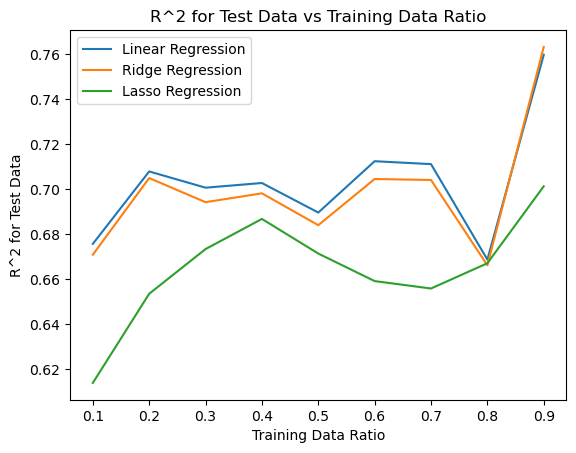

In [7]:
linear_R2_list = []
ridge_R2_list = []
lasso_R2_list = []

r_values = np.linspace(0.1, 0.9, 9)

for r in r_values:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - r, random_state=42)
    
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(X_train, Y_train)
    linear_Y_predicted = linear_reg_model.predict(X_test)
    linear_R2_list.append(r2_score(Y_test, linear_Y_predicted))
    
    ridge_model = Ridge()
    ridge_model.fit(X_train, Y_train)
    ridge_Y_predicted = ridge_model.predict(X_test)
    ridge_R2_list.append(r2_score(Y_test, ridge_Y_predicted))

    lasso_model = Lasso()
    lasso_model.fit(X_train, Y_train)
    lasso_Y_predicted = lasso_model.predict(X_test)
    lasso_R2_list.append(r2_score(Y_test, lasso_Y_predicted))
    
    
plt.plot(r_values, linear_R2_list, label='Linear Regression')
plt.plot(r_values, ridge_R2_list, label='Ridge Regression')
plt.plot(r_values, lasso_R2_list, label='Lasso Regression')
plt.xlabel('Training Data Ratio')
plt.ylabel('R^2 for Test Data')
plt.title('R^2 for Test Data vs Training Data Ratio')
plt.legend()
plt.show()



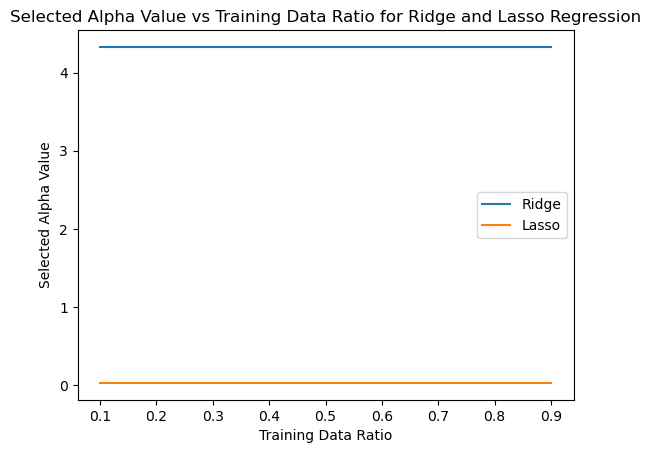

In [8]:
ridge_alpha_list = []
lasso_alpha_list = []

r_values = np.linspace(0.1, 0.9, 9)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

for r in r_values:    
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(X_train, Y_train)
    linear_Y_predicted = linear_reg_model.predict(X_test)
    linear_R2_list.append(r2_score(Y_test, linear_Y_predicted))

    ridge_model_alpha = RidgeCV(alphas=np.logspace(-3,3,100),cv = 5)
    ridge_model_alpha.fit(X_train_normalized, Y_train)
    ridge_alpha_list.append(ridge_model_alpha.alpha_)
    
    lasso_model_alpha = LassoCV(alphas=np.logspace(-3,3,100),cv = 5)
    lasso_model_alpha.fit(X_train_normalized, Y_train)
    lasso_alpha_list.append(lasso_model_alpha.alpha_)
    
plt.plot(r_values, ridge_alpha_list, label='Ridge')
plt.plot(r_values, lasso_alpha_list, label='Lasso')
plt.xlabel('Training Data Ratio')
plt.ylabel('Selected Alpha Value')
plt.title('Selected Alpha Value vs Training Data Ratio for Ridge and Lasso Regression')
plt.legend()
plt.show()

As the training data ratio increases, all three methods tend to perform better, with R² values generally increasing. This is expected because with more training data, the models have more information to learn from. We can see increase and decreases in the plots but they are general tending to increase as we expect. As we can see at ratio = 0.8 which is the traing ratio we usually use, thhe three plots nearly intersect, meaning the differences in performance between Linear Regression, Ridge Regression, and Lasso Regression are minimized. The R^2 values for Ridge Regression are consistently higher than Lasso Regression but slightly lower than Linear Regression. Ridge Regression effectively prevents overfitting compared to Linear Regression, as evidenced by its slightly lower R^2 values across different ratios. Lasso Regression introduces sparsity by forcing some coefficients to zero, which can lead to slightly lower predictive performance compared to Ridge Regression.\
For Ridge Regression, the selected alpha value remains constant at around 0.28 across different training data ratios. This suggests that Ridge Regression doesn't heavily depend on the amount of training data; rather, it finds a stable regularization parameter. For Lasso Regression, the selected alpha value also remains constant at about 4.33 irrespective of the training data ratio. Similar to Ridge, Lasso seems to find an optimal regularization parameter that is relatively independent of the training data ratio. Ridge Regression typically maintains a lower alpha compared to Lasso Regression, indicating that Ridge places less penalty on the coefficients and tends to shrink them more gently compared to Lasso. This is reflected in the slightly higher R² values of Ridge Regression compared to Lasso Regression.